## Mlops - introduction



In [61]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [62]:
df = pd.read_parquet('./data/yellow_tripdata_2012-01.parquet')


In [63]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2012-01-01 00:07:56,2012-01-01 00:12:09,1,0.9,1,N,158,231,2,4.9,0.5,0.5,0.0,0.0,0.0,5.9,None,None
1,1,2012-01-01 00:18:49,2012-01-01 00:30:01,1,2.3,1,N,231,164,2,8.5,0.5,0.5,0.0,0.0,0.0,9.5,None,None
2,1,2012-01-01 00:31:38,2012-01-01 00:46:05,1,2.2,1,N,164,148,2,9.3,0.5,0.5,0.0,0.0,0.0,10.3,None,None


In [64]:
df.shape

(13058348, 19)

In [65]:
df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60) #take time in minuts

In [66]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge             object
airport_fee                      object
duration                        float64
dtype: object

In [67]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [68]:
# PULocationID tlc taxi zon ein which the taximeter was engaged (se activa taximetro)
# DOLocationID tlc tazin in zone which the taximeter was disengaded (se desactivó taximetro)
categorical = ["PULocationID", "DOLocationID"]
numerical = ["trip_distance"]
df[categorical] = df[categorical].astype(str)



In [69]:
from sklearn.feature_extraction import DictVectorizer

# Ejemplo de datos en forma de lista de diccionarios
datos = [
    {'género': 'masculino', 'edad': 25, 'ingreso': 40000},
    {'género': 'femenino', 'edad': 30, 'ingreso': 60000},
    {'género': 'femenino', 'edad': 35, 'ingreso': 80000},
    {'género': 'masculino', 'edad': 40, 'ingreso': 50000}
]

# Crear una instancia de DictVectorizer
vectorizador = DictVectorizer()

# Aplicar DictVectorizer a los datos
datos_transformados = vectorizador.fit_transform(datos)

# Obtener la matriz numérica resultante
matriz_numerica = datos_transformados.toarray()

In [70]:
matriz_numerica

array([[2.5e+01, 0.0e+00, 1.0e+00, 4.0e+04],
       [3.0e+01, 1.0e+00, 0.0e+00, 6.0e+04],
       [3.5e+01, 1.0e+00, 0.0e+00, 8.0e+04],
       [4.0e+01, 0.0e+00, 1.0e+00, 5.0e+04]])

In [71]:
#In summary, DictVectorizer is useful when we work with categorical or textual features in our data,
# we need to convert them into numerical features to apply machine learning algorithms
dv = DictVectorizer()

train_dicts = df[categorical + numerical].to_dict(orient= "records")

#.to_dict(orient="records"): el método to_dict() se utiliza para convertir el DataFrame en un diccionario. 
# El argumento orient="records" especifica el formato del diccionario de salida. En este caso, el orientamiento se establece en "records", 
# lo que significa que cada fila del DataFrame se convierte en un diccionario separado en la lista resultante.
#El resultado de esta línea de código es la variable train_dicts, que es una lista de diccionarios. Cada diccionario representa una fila del DataFrame original df, donde las claves del #diccionario son los nombres de las columnas y los valores son los valores correspondientes en cada fila.

#Esta transformación de DataFrame a una lista de diccionarios es útil cuando se trabaja con bibliotecas de aprendizaje automático que requieren que los datos estén en formato de diccionario, 
# como scikit-learn. Permite pasar los datos en una estructura más flexible y fácilmente interpretable por los algoritmos de aprendizaje automático.








In [72]:
train_dicts[0]

{'PULocationID': '158', 'DOLocationID': '231', 'trip_distance': 0.9}

In [73]:
X_train = dv.fit_transform(train_dicts)
target = "duration"
y_train = df[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

4.89337806508859

/var/folders/w0/7y084pbj1kbdqv7gzhk4jb7dh0zr10/T/ipykernel_6607/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/w0/7y084pbj1kbdqv7gzhk4jb7dh0zr10/T/ipykernel_6607/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

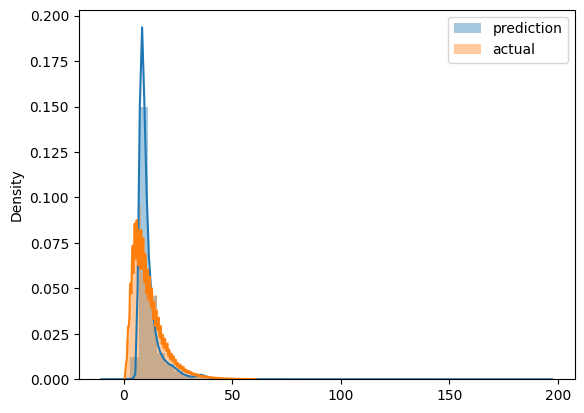

In [74]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [75]:
# read data and processing

def read_data(filename):
    if filename.endswith(".csv"):

        df = pd.read_csv(filename)
        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

    elif filename.endswith(".parquet"):
        df = pd.read_parquet(filename)

    # extract y_value that will be usefull for training and compare with test predictions
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df
    
    
    


In [76]:
df_train = read_data("./data/green_tripdata_2021-01.parquet")
df_val = read_data("./data/green_tripdata_2021-02.parquet")

In [77]:
len(df_train), len(df_val)

(73908, 61921)

In [78]:
df_train["PU_DO"] = df_train["PULocationID"] + "_" + df_train["DOLocationID"]
df_val["PU_DO"] = df_val["PULocationID"] + "_" + df_val["DOLocationID"]

In [79]:
df_train.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'duration', 'PU_DO'],
      dtype='object')

In [80]:
categorical = ["PU_DO"]
numerical = ["trip_distance"]

dv = DictVectorizer()
x_train_dics = df_train[categorical + numerical].to_dict(orient="records")
x_train = dv.fit_transform(x_train_dics)
val_dicts = df_val[categorical + numerical].to_dict(orient="records")
x_val = dv.transform(val_dicts)



In [82]:
target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values

In [83]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)


In [84]:
mean_squared_error(y_train, y_pred_train, squared=False)

5.699564118198945

In [85]:
with open('./models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [86]:
lr = Lasso(0.001)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
mean_squared_error(y_train, y_pred, squared=False)

8.345478908061276